In [539]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras import models
from tensorflow.keras import layers 
from tensorflow.keras import optimizers
%matplotlib inline

In [372]:
df = pd.read_csv('call_data_2018_2020.csv')
df.head()

,PolicyYear,total_calls,total_claims,InitialWrittenPremiumAmt,Age,AgeAtInception,Copay,Deductible,Limit,Duration,...,StateDivision_CAN-Other,StateDivision_East North Central,StateDivision_East South Central,StateDivision_Middle Atlantic,StateDivision_Mountain,StateDivision_New England,StateDivision_Pacific,StateDivision_South Atlantic,StateDivision_West North Central,StateDivision_West South Central
0,2018,0,0.0,604.37,2,2,0.8,300.0,15000.0,80.0,...,0,0,0,0,0,0,0,0,0,0
1,2018,0,0.0,509.59,5,1,0.9,250.0,10000000.0,1819.0,...,0,0,0,0,0,0,0,0,0,0
2,2018,0,0.0,395.65,7,6,0.8,500.0,20000.0,489.0,...,0,0,0,0,0,0,0,0,0,0
3,2018,0,0.0,299.67,0,0,0.9,400.0,10000.0,336.0,...,0,0,0,0,0,0,0,0,0,0
4,2018,1,0.0,590.34,1,0,0.8,150.0,15000.0,713.0,...,0,0,0,0,0,0,0,0,0,0


In [373]:
df['target'] = df.total_calls.apply(lambda x: 0 if x == 0 else 1)
df.head()

,PolicyYear,total_calls,total_claims,InitialWrittenPremiumAmt,Age,AgeAtInception,Copay,Deductible,Limit,Duration,...,StateDivision_East North Central,StateDivision_East South Central,StateDivision_Middle Atlantic,StateDivision_Mountain,StateDivision_New England,StateDivision_Pacific,StateDivision_South Atlantic,StateDivision_West North Central,StateDivision_West South Central,target
0,2018,0,0.0,604.37,2,2,0.8,300.0,15000.0,80.0,...,0,0,0,0,0,0,0,0,0,0
1,2018,0,0.0,509.59,5,1,0.9,250.0,10000000.0,1819.0,...,0,0,0,0,0,0,0,0,0,0
2,2018,0,0.0,395.65,7,6,0.8,500.0,20000.0,489.0,...,0,0,0,0,0,0,0,0,0,0
3,2018,0,0.0,299.67,0,0,0.9,400.0,10000.0,336.0,...,0,0,0,0,0,0,0,0,0,0
4,2018,1,0.0,590.34,1,0,0.8,150.0,15000.0,713.0,...,0,0,0,0,0,0,0,0,0,1


In [416]:
df_1819 = df[df.PolicyYear>=2018]
df_20 = df[df.PolicyYear == 2020]
df_1819.head()

,PolicyYear,total_calls,total_claims,InitialWrittenPremiumAmt,Age,AgeAtInception,Copay,Deductible,Limit,Duration,...,StateDivision_East North Central,StateDivision_East South Central,StateDivision_Middle Atlantic,StateDivision_Mountain,StateDivision_New England,StateDivision_Pacific,StateDivision_South Atlantic,StateDivision_West North Central,StateDivision_West South Central,target
0,2018,0,0.0,604.37,2,2,0.8,300.0,15000.0,80.0,...,0,0,0,0,0,0,0,0,0,0
1,2018,0,0.0,509.59,5,1,0.9,250.0,10000000.0,1819.0,...,0,0,0,0,0,0,0,0,0,0
2,2018,0,0.0,395.65,7,6,0.8,500.0,20000.0,489.0,...,0,0,0,0,0,0,0,0,0,0
3,2018,0,0.0,299.67,0,0,0.9,400.0,10000.0,336.0,...,0,0,0,0,0,0,0,0,0,0
4,2018,1,0.0,590.34,1,0,0.8,150.0,15000.0,713.0,...,0,0,0,0,0,0,0,0,0,1


In [417]:
X = df_1819.iloc[:, 2:-1]
y = df_1819.iloc[:, -1]

In [418]:
X

,total_claims,InitialWrittenPremiumAmt,Age,AgeAtInception,Copay,Deductible,Limit,Duration,call_y_n,ReasonAttrBucketLC_Affiliate,...,StateDivision_CAN-Other,StateDivision_East North Central,StateDivision_East South Central,StateDivision_Middle Atlantic,StateDivision_Mountain,StateDivision_New England,StateDivision_Pacific,StateDivision_South Atlantic,StateDivision_West North Central,StateDivision_West South Central
0,0.0,604.37,2,2,0.8,300.0,15000.0,80.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,509.59,5,1,0.9,250.0,10000000.0,1819.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,395.65,7,6,0.8,500.0,20000.0,489.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,299.67,0,0,0.9,400.0,10000.0,336.0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0.0,590.34,1,0,0.8,150.0,15000.0,713.0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401003,3.0,323.93,0,0,0.8,300.0,15000.0,64.0,1,1,...,0,0,0,1,0,0,0,0,0,0
401004,2.0,284.49,5,5,0.8,300.0,15000.0,305.0,1,1,...,0,0,0,1,0,0,0,0,0,0
401005,2.0,284.49,5,5,0.8,300.0,15000.0,305.0,1,1,...,0,0,0,1,0,0,0,0,0,0
401006,0.0,726.82,3,3,0.8,300.0,5000.0,72.0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [419]:
y

0         0
1         0
2         0
3         0
4         1
         ..
401003    1
401004    1
401005    1
401006    0
401007    0
Name: target, Length: 401008, dtype: int64

In [420]:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X)
y_train = to_categorical(y, num_classes=2)
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [421]:
X_test = scaler.fit_transform(df_20.iloc[:, 2:-1])
y_test = to_categorical(df_20.iloc[:, -1], num_classes=2)

In [422]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(401008, 94)
(171340, 94)
(401008, 2)
(171340, 2)


In [436]:
model_1 = Sequential()
model_1.add(layers.Dense(100, activation = 'tanh', input_shape = (94,)))
model_1.add(layers.Dense(50, activation = 'tanh'))
model_1.add(layers.Dense(25, activation = 'tanh'))
# model_1.add(layers.Dropout(0.3))
model_1.add(layers.Dense(2, activation = 'sigmoid'))

In [437]:
model_1.compile(optimizer='SGD',
               loss='binary_crossentropy',
               metrics = ['accuracy'])

In [438]:
model_1.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_94 (Dense)             (None, 100)               9500      
_________________________________________________________________
dense_95 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_96 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_97 (Dense)             (None, 2)                 52        
Total params: 15,877
Trainable params: 15,877
Non-trainable params: 0
_________________________________________________________________


In [439]:
history = model_1.fit(X_train,
                    y_train,
                    epochs=12,
                    batch_size=256,
                    validation_split=0.3
#                     validation_data = (X_test, y_test)
                   )

Epoch 1/12
1097/1097 [==============================] - 2s 2ms/step - loss: 0.3949 - accuracy: 0.8572 - val_loss: 0.0259 - val_accuracy: 0.9987
Epoch 2/12
1097/1097 [==============================] - 2s 2ms/step - loss: 0.0202 - accuracy: 0.9989 - val_loss: 0.0096 - val_accuracy: 0.9992
Epoch 3/12
1097/1097 [==============================] - 2s 2ms/step - loss: 0.0085 - accuracy: 0.9996 - val_loss: 0.0057 - val_accuracy: 0.9994
Epoch 4/12
1097/1097 [==============================] - 2s 2ms/step - loss: 0.0052 - accuracy: 0.9998 - val_loss: 0.0040 - val_accuracy: 0.9997
Epoch 5/12
1097/1097 [==============================] - 2s 2ms/step - loss: 0.0037 - accuracy: 0.9998 - val_loss: 0.0031 - val_accuracy: 0.9998
Epoch 6/12
1097/1097 [==============================] - 2s 2ms/step - loss: 0.0030 - accuracy: 0.9999 - val_loss: 0.0025 - val_accuracy: 0.9998
Epoch 7/12
1097/1097 [==============================] - 2s 2ms/step - loss: 0.0024 - accuracy: 0.9999 - val_loss: 0.0021 - val_accuracy:

In [440]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [441]:
def visualize_trainandval_results(results):
    plt.style.use('seaborn-ticks')
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_acc', 'acc'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

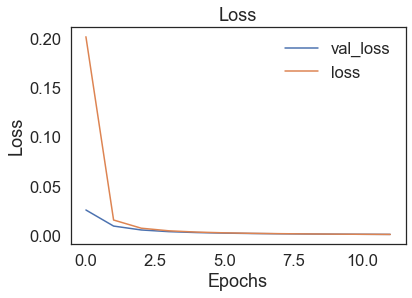

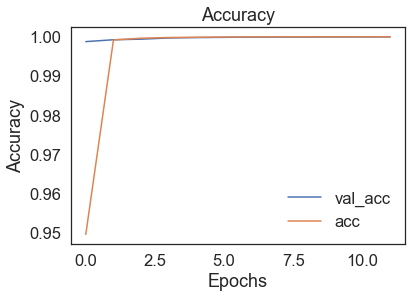

In [442]:
visualize_trainandval_results(history)

In [443]:
results_test = model_1.evaluate(X_test, y_test)
results_test

5355/5355 [==============================] - 3s 600us/step - loss: 0.0012 - accuracy: 0.9999


[0.0012300939997658134, 0.999912440776825]

In [444]:
y_hat_train = model_1.predict(X_train)
y_pred = y_hat_train[:, 1]
y_pred = [1 if i> 0.5 else 0 for i in y_pred]
y_pred[:20]

[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]

In [445]:
df_1819['y_pred']=y_pred

In [446]:
f1_score(df_1819.target, df_1819.y_pred, average='weighted')

0.9999451378492178

<Figure size 432x288 with 0 Axes>

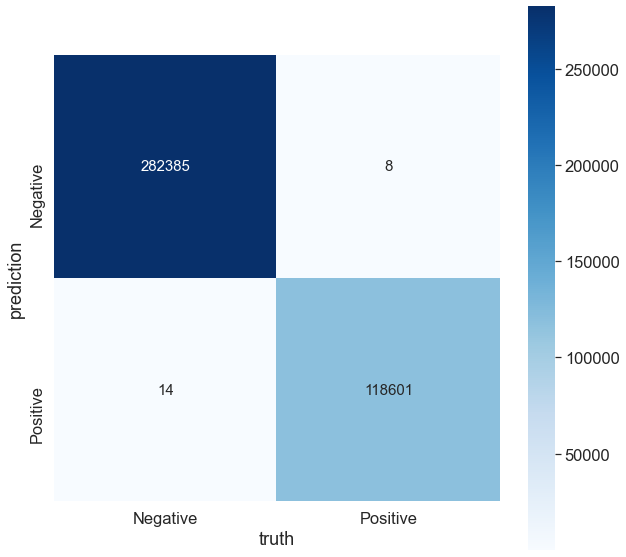

In [447]:
array = confusion_matrix(df_1819.target, df_1819.y_pred, labels=[0, 1])
df_cm = pd.DataFrame(array, index = ['Negative', 'Positive'],
                  columns = ['Negative', 'Positive'])
sns.set(font_scale=1.5)

df_cm = pd.DataFrame(array, index = ['Negative', 'Positive'],
                  columns = ['Negative', 'Positive'])
plt.tight_layout()
plt.figure(figsize = (10,10))
sns.heatmap(df_cm, annot=True, fmt="d", square=True, cmap= 'Blues', annot_kws={"fontsize":15})
plt.ylabel('prediction', fontsize = 18)
plt.xlabel('truth', fontsize = 18)
plt.show()

In [448]:
X = df_1819[df_1819.y_pred>0].iloc[:, 2:-2]
y = df_1819[df_1819.y_pred>0].iloc[:, 1]
X.reset_index(drop=True, inplace = True)
y.reset_index(drop=True, inplace = True)

In [449]:
y.describe()

count    118609.000000
mean          2.189404
std           1.820928
min           0.000000
25%           1.000000
50%           1.000000
75%           3.000000
max          11.000000
Name: total_calls, dtype: float64

<AxesSubplot:>

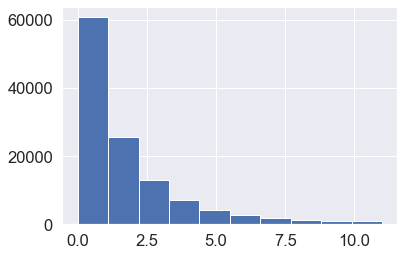

In [451]:
y.hist()

In [452]:
y_hat_train = model_1.predict(X_test)
y_pred = y_hat_train[:, 1]
y_pred = [1 if i> 0.5 else 0 for i in y_pred]
y_pred[:20]

[0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0]

In [453]:
df_20['y_pred'] = y_pred
df_20

C:\Users\liuzo\.conda\envs\new-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,PolicyYear,total_calls,total_claims,InitialWrittenPremiumAmt,Age,AgeAtInception,Copay,Deductible,Limit,Duration,...,StateDivision_East South Central,StateDivision_Middle Atlantic,StateDivision_Mountain,StateDivision_New England,StateDivision_Pacific,StateDivision_South Atlantic,StateDivision_West North Central,StateDivision_West South Central,target,y_pred
228779,2020,0,2.0,189.79,2,2,0.8,500.0,5000.0,210.0,...,0,0,0,0,1,0,0,0,0,0
228791,2020,1,0.0,283.35,2,1,0.8,300.0,15000.0,404.0,...,0,0,0,0,1,0,0,0,1,1
228794,2020,9,180.0,1391.00,11,4,0.9,300.0,20000.0,2901.0,...,0,0,0,0,1,0,0,0,1,1
228825,2020,1,0.0,238.92,1,0,0.8,300.0,15000.0,429.0,...,0,0,0,0,1,0,0,0,1,1
228835,2020,0,0.0,278.08,1,1,0.9,250.0,5000.0,65.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401003,2020,2,3.0,323.93,0,0,0.8,300.0,15000.0,64.0,...,0,1,0,0,0,0,0,0,1,1
401004,2020,1,2.0,284.49,5,5,0.8,300.0,15000.0,305.0,...,0,1,0,0,0,0,0,0,1,1
401005,2020,1,2.0,284.49,5,5,0.8,300.0,15000.0,305.0,...,0,1,0,0,0,0,0,0,1,1
401006,2020,0,0.0,726.82,3,3,0.8,300.0,5000.0,72.0,...,0,1,0,0,0,0,0,0,0,0


In [454]:
X_test = df_20[df_20.y_pred>0].iloc[:, 2:-2]
y_test = df_20[df_20.y_pred>0].iloc[:, 1]
X_test.reset_index(drop=True, inplace = True)
y_test.reset_index(drop=True, inplace = True)

# Regression

In [455]:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X)
y_train = y
y_train

0         1
1         2
2         1
3         1
4         2
         ..
118604    1
118605    1
118606    2
118607    1
118608    1
Name: total_calls, Length: 118609, dtype: int64

In [456]:
X_test = scaler.fit_transform(X_test)

In [457]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(118609, 94)
(48560, 94)
(118609,)
(48560,)


In [503]:
def build_and_compile_model():
    model = Sequential([
      layers.Dense(128, activation='relu', input_shape=(94,), kernel_regularizer=regularizers.l1(0.0001)),
      layers.Dropout(0.3),
      layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.0001)),
      layers.Dropout(0.3),
      layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l1(0.0001)),
      layers.Dropout(0.3),
      layers.Dense(1)
    ])

    model.compile(loss='mean_squared_error',
                optimizer=tf.keras.optimizers.Adam(), metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model

In [504]:
regression = build_and_compile_model()
regression.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_126 (Dense)            (None, 128)               12160     
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_127 (Dense)            (None, 64)                8256      
_________________________________________________________________
dropout_10 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_128 (Dense)            (None, 32)                2080      
_________________________________________________________________
dropout_11 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_129 (Dense)            (None, 1)               

In [505]:
history = regression.fit(X_train,
                    y_train,
                    epochs=50,
                    batch_size=256,
                    validation_split=0.3
#                     validation_data = (X_test, y_test)
                   )

Epoch 1/50
325/325 [==============================] - 2s 3ms/step - loss: 4.5209 - root_mean_squared_error: 2.0757 - val_loss: 3.5648 - val_root_mean_squared_error: 1.8376
Epoch 2/50
325/325 [==============================] - 1s 3ms/step - loss: 3.7345 - root_mean_squared_error: 1.8837 - val_loss: 3.3947 - val_root_mean_squared_error: 1.7929
Epoch 3/50
325/325 [==============================] - 1s 3ms/step - loss: 3.5081 - root_mean_squared_error: 1.8248 - val_loss: 3.3952 - val_root_mean_squared_error: 1.7952
Epoch 4/50
325/325 [==============================] - 1s 3ms/step - loss: 3.4199 - root_mean_squared_error: 1.8024 - val_loss: 3.2597 - val_root_mean_squared_error: 1.7590
Epoch 5/50
325/325 [==============================] - 1s 3ms/step - loss: 3.3716 - root_mean_squared_error: 1.7909 - val_loss: 3.2883 - val_root_mean_squared_error: 1.7690
Epoch 6/50
325/325 [==============================] - 1s 3ms/step - loss: 3.3223 - root_mean_squared_error: 1.7790 - val_loss: 3.2355 - val_

325/325 [==============================] - 1s 3ms/step - loss: 3.0323 - root_mean_squared_error: 1.7159 - val_loss: 3.0706 - val_root_mean_squared_error: 1.7271
Epoch 48/50
325/325 [==============================] - 1s 3ms/step - loss: 2.9659 - root_mean_squared_error: 1.6964 - val_loss: 3.0540 - val_root_mean_squared_error: 1.7223
Epoch 49/50
325/325 [==============================] - 1s 3ms/step - loss: 2.9719 - root_mean_squared_error: 1.6981 - val_loss: 3.0572 - val_root_mean_squared_error: 1.7231
Epoch 50/50
325/325 [==============================] - 1s 3ms/step - loss: 3.0292 - root_mean_squared_error: 1.7147 - val_loss: 3.0708 - val_root_mean_squared_error: 1.7270


In [471]:
history.history.keys()

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])

In [472]:
def visualize_trainandval_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_root_mean_squared_error'])
    plt.plot(history['root_mean_squared_error'])
    plt.legend(['val_root_mean_squared_error', 'root_mean_squared_error'])
    plt.title('root_mean_squared_error')
    plt.xlabel('Epochs')
    plt.ylabel('root_mean_squared_error')
    plt.show()

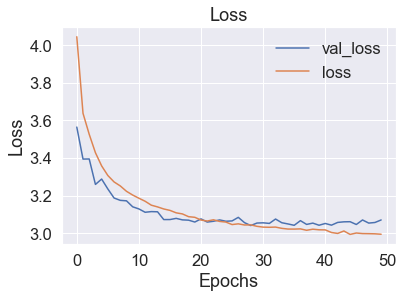

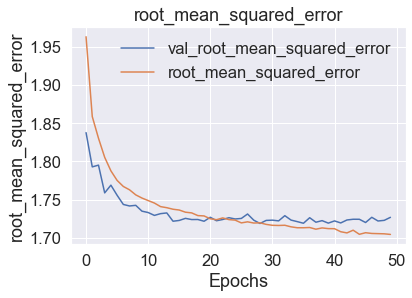

In [506]:
visualize_trainandval_results(history)

In [305]:
regression.predict(X_test).sum()

107766.58

In [306]:
y_test.sum()

105538

# Regression - claims

In [600]:
df_1819.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401008 entries, 0 to 401007
Data columns (total 98 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   PolicyYear                                     401008 non-null  int64  
 1   total_calls                                    401008 non-null  int64  
 2   total_claims                                   401008 non-null  float64
 3   InitialWrittenPremiumAmt                       401008 non-null  float64
 4   Age                                            401008 non-null  int64  
 5   AgeAtInception                                 401008 non-null  int64  
 6   Copay                                          401008 non-null  float64
 7   Deductible                                     401008 non-null  float64
 8   Limit                                          401008 non-null  float64
 9   Duration                             

In [583]:
df_1819.target = df_1819.total_claims.apply(lambda x: 0 if x ==0 else 1)
df_1819

,PolicyYear,total_calls,total_claims,InitialWrittenPremiumAmt,Age,AgeAtInception,Copay,Deductible,Limit,Duration,...,StateDivision_East South Central,StateDivision_Middle Atlantic,StateDivision_Mountain,StateDivision_New England,StateDivision_Pacific,StateDivision_South Atlantic,StateDivision_West North Central,StateDivision_West South Central,target,y_pred
0,2018,0,0.0,604.37,2,2,0.8,300.0,15000.0,80.0,...,0,0,0,0,0,0,0,0,0,0
1,2018,0,0.0,509.59,5,1,0.9,250.0,10000000.0,1819.0,...,0,0,0,0,0,0,0,0,0,0
2,2018,0,0.0,395.65,7,6,0.8,500.0,20000.0,489.0,...,0,0,0,0,0,0,0,0,0,0
3,2018,0,0.0,299.67,0,0,0.9,400.0,10000.0,336.0,...,0,0,0,0,0,0,0,0,0,0
4,2018,1,0.0,590.34,1,0,0.8,150.0,15000.0,713.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401003,2020,2,3.0,323.93,0,0,0.8,300.0,15000.0,64.0,...,0,1,0,0,0,0,0,0,1,1
401004,2020,1,2.0,284.49,5,5,0.8,300.0,15000.0,305.0,...,0,1,0,0,0,0,0,0,1,0
401005,2020,1,2.0,284.49,5,5,0.8,300.0,15000.0,305.0,...,0,1,0,0,0,0,0,0,1,0
401006,2020,0,0.0,726.82,3,3,0.8,300.0,5000.0,72.0,...,0,1,0,0,0,0,0,0,0,0


In [604]:
X = df_1819[df_1819['PolicyType_New Business'] == 1].iloc[:, 3:-2]
y = df_1819[df_1819['PolicyType_New Business'] == 1].iloc[:, -2]
# y = [0 if i==0 else 1 for i in y]
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace = True)

In [607]:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X)
y_train = to_categorical(y, num_classes=2)
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [608]:
print(X_train.shape)
# print(X_test.shape)
print(y_train.shape)
# print(y_test.shape)

(132403, 93)
(132403, 2)


In [609]:
model_2 = Sequential()
model_2.add(layers.Dense(64, activation = 'tanh', input_shape = (93,)))
model_2.add(layers.Dense(32, activation = 'tanh'))

model_2.add(layers.Dense(16, activation = 'tanh'))
# model_2.add(layers.Dropout(0.3))
model_2.add(layers.Dense(2, activation = 'sigmoid'))

In [610]:
model_2.compile(optimizer='SGD',
               loss='binary_crossentropy',
               metrics = ['accuracy'])
model_2.summary()

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_166 (Dense)            (None, 64)                6016      
_________________________________________________________________
dense_167 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_168 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_169 (Dense)            (None, 2)                 34        
Total params: 8,658
Trainable params: 8,658
Non-trainable params: 0
_________________________________________________________________


In [611]:
history = model_2.fit(X_train,
                    y_train,
                    epochs=50,
                    batch_size=256,
                    validation_split=0.3
#                     validation_data = (X_test, y_test)
                   )

Epoch 1/50
363/363 [==============================] - 1s 2ms/step - loss: 0.6904 - accuracy: 0.5820 - val_loss: 0.5925 - val_accuracy: 0.7303
Epoch 2/50
363/363 [==============================] - 1s 2ms/step - loss: 0.5765 - accuracy: 0.7386 - val_loss: 0.5637 - val_accuracy: 0.7313
Epoch 3/50
363/363 [==============================] - 1s 2ms/step - loss: 0.5504 - accuracy: 0.7415 - val_loss: 0.5505 - val_accuracy: 0.7324
Epoch 4/50
363/363 [==============================] - 1s 2ms/step - loss: 0.5411 - accuracy: 0.7413 - val_loss: 0.5427 - val_accuracy: 0.7362
Epoch 5/50
363/363 [==============================] - 1s 2ms/step - loss: 0.5362 - accuracy: 0.7424 - val_loss: 0.5384 - val_accuracy: 0.7384
Epoch 6/50
363/363 [==============================] - 1s 2ms/step - loss: 0.5328 - accuracy: 0.7438 - val_loss: 0.5355 - val_accuracy: 0.7396
Epoch 7/50
363/363 [==============================] - 1s 2ms/step - loss: 0.5298 - accuracy: 0.7460 - val_loss: 0.5339 - val_accuracy: 0.7407
Epoch 

In [533]:
def visualize_trainandval_results(results):
    plt.style.use('seaborn-ticks')
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_acc', 'acc'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

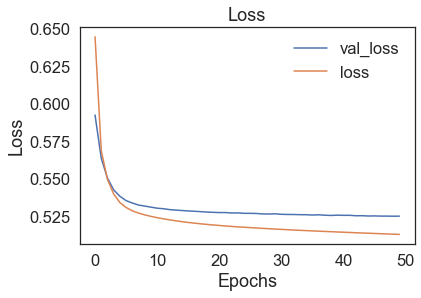

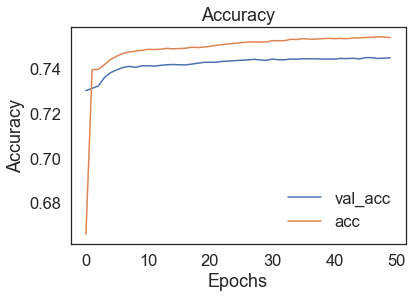

In [612]:
visualize_trainandval_results(history)

In [613]:
y_hat_train = model_2.predict(X_train)
y_pred = y_hat_train[:, 1]
y_pred = [1 if i> 0.5 else 0 for i in y_pred]
y_pred[:20]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1]

In [616]:
new = df_1819[df_1819['PolicyType_New Business'] == 1]
new['y_pred'] = y_pred

C:\Users\liuzo\.conda\envs\new-env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [617]:
new

,PolicyYear,total_calls,total_claims,InitialWrittenPremiumAmt,Age,AgeAtInception,Copay,Deductible,Limit,Duration,...,StateDivision_East South Central,StateDivision_Middle Atlantic,StateDivision_Mountain,StateDivision_New England,StateDivision_Pacific,StateDivision_South Atlantic,StateDivision_West North Central,StateDivision_West South Central,target,y_pred
0,2018,0,0.0,604.37,2,2,0.8,300.0,15000.0,80.0,...,0,0,0,0,0,0,0,0,0,0
3,2018,0,0.0,299.67,0,0,0.9,400.0,10000.0,336.0,...,0,0,0,0,0,0,0,0,0,0
8,2018,0,0.0,353.87,0,0,0.8,300.0,15000.0,34.0,...,0,0,0,0,0,0,0,0,0,0
11,2018,0,0.0,701.34,0,0,0.8,300.0,15000.0,45.0,...,0,0,0,0,0,0,0,0,0,0
12,2018,0,0.0,422.70,0,0,0.8,400.0,10000.0,66.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401001,2020,0,0.0,321.01,0,0,0.8,300.0,15000.0,147.0,...,0,0,0,0,0,1,0,0,0,0
401003,2020,2,3.0,323.93,0,0,0.8,300.0,15000.0,64.0,...,0,1,0,0,0,0,0,0,1,0
401004,2020,1,2.0,284.49,5,5,0.8,300.0,15000.0,305.0,...,0,1,0,0,0,0,0,0,1,0
401005,2020,1,2.0,284.49,5,5,0.8,300.0,15000.0,305.0,...,0,1,0,0,0,0,0,0,1,1


In [618]:
f1_score(new.target, new.y_pred, average='weighted')

0.7032537230142443

In [619]:
results_test = model_2.evaluate(X_train, y_train)
results_test

4138/4138 [==============================] - 2s 587us/step - loss: 0.5165 - accuracy: 0.7517


[0.5164662599563599, 0.7517427802085876]

In [620]:
print(classification_report(new.target, new.y_pred))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85     97658
           1       0.58      0.20      0.29     34745

    accuracy                           0.75    132403
   macro avg       0.67      0.57      0.57    132403
weighted avg       0.72      0.75      0.70    132403



<Figure size 432x288 with 0 Axes>

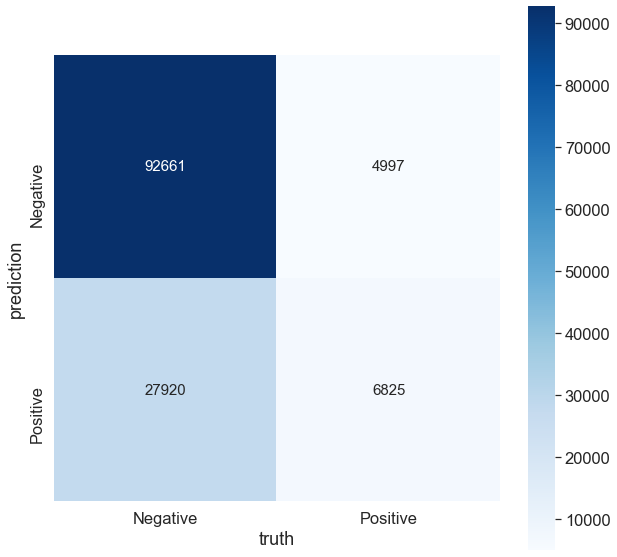

In [621]:
array = confusion_matrix(new.target, new.y_pred, labels=[0, 1])
df_cm = pd.DataFrame(array, index = ['Negative', 'Positive'],
                  columns = ['Negative', 'Positive'])
sns.set(font_scale=1.5)

df_cm = pd.DataFrame(array, index = ['Negative', 'Positive'],
                  columns = ['Negative', 'Positive'])
plt.tight_layout()
plt.figure(figsize = (10,10))
sns.heatmap(df_cm, annot=True, fmt="d", square=True, cmap= 'Blues', annot_kws={"fontsize":15})
plt.ylabel('prediction', fontsize = 18)
plt.xlabel('truth', fontsize = 18)
plt.show()

In [599]:
for i in np.linspace(0.1, 1, num = 49):
    print(f'percentile {i}: ', df_1819[df_1819.y_pred>0].total_claims.quantile(i))

percentile 0.1:  0.0
percentile 0.11875000000000001:  0.0
percentile 0.1375:  0.0
percentile 0.15625:  0.0
percentile 0.175:  0.0
percentile 0.19375:  0.0
percentile 0.2125:  0.0
percentile 0.23125:  0.0
percentile 0.25:  0.0
percentile 0.26875:  0.0
percentile 0.2875:  0.0
percentile 0.30625:  0.0
percentile 0.32499999999999996:  0.0
percentile 0.34375:  0.0
percentile 0.36250000000000004:  0.0
percentile 0.38125:  0.0
percentile 0.4:  0.0
percentile 0.41874999999999996:  2.0
percentile 0.4375:  2.0
percentile 0.45625000000000004:  3.0
percentile 0.475:  4.0
percentile 0.49375:  4.0
percentile 0.5125:  5.0
percentile 0.53125:  6.0
percentile 0.5499999999999999:  6.0
percentile 0.56875:  7.0
percentile 0.5875:  8.0
percentile 0.60625:  8.0
percentile 0.625:  9.0
percentile 0.6437499999999999:  10.0
percentile 0.6625:  12.0
percentile 0.6812499999999999:  12.0
percentile 0.7:  14.0
percentile 0.71875:  16.0
percentile 0.7374999999999999:  18.0
percentile 0.75625:  20.0
percentile 0.7749

(0.0, 50.0)

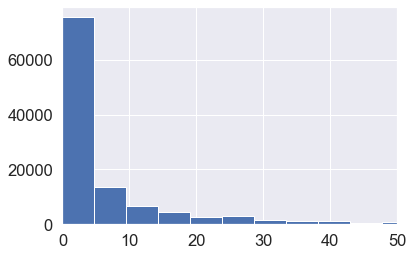

In [576]:
df_1819[df_1819.target>0].total_claims.hist(bins=500)
plt.xlim(0, 50)

In [548]:
X = df_1819[df_1819.y_pred>0].iloc[:, 3:-2]
y = df_1819[df_1819.y_pred>0].iloc[:, 2]
X.reset_index(drop=True, inplace = True)
y.reset_index(drop=True, inplace = True)

In [551]:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X)
y_train = y
y_train

0         0.0
1         0.0
2         0.0
3        20.0
4         0.0
         ... 
63112     0.0
63113     2.0
63114    10.0
63115    80.0
63116     3.0
Name: total_claims, Length: 63117, dtype: float64

In [566]:
y.describe()

count    63117.000000
mean        23.666952
std         62.404393
min          0.000000
25%          0.000000
50%          4.000000
75%         20.000000
max       2385.000000
Name: total_claims, dtype: float64

In [563]:
def build_and_compile_model():
    model = Sequential([
      layers.Dense(128, activation='relu', input_shape=(93,), kernel_regularizer=regularizers.l1(0.0001)),
      layers.Dropout(0.3),
      layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.0001)),
      layers.Dropout(0.3),
      layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l1(0.0001)),
      layers.Dropout(0.3),
      layers.Dense(1)
    ])

    model.compile(loss='mean_squared_error',
                optimizer=tf.keras.optimizers.Adam(), metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model

In [564]:
regression = build_and_compile_model()
regression.summary()

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_158 (Dense)            (None, 128)               12032     
_________________________________________________________________
dropout_18 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_159 (Dense)            (None, 64)                8256      
_________________________________________________________________
dropout_19 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_160 (Dense)            (None, 32)                2080      
_________________________________________________________________
dropout_20 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_161 (Dense)            (None, 1)               

In [565]:
history = regression.fit(X_train,
                    y_train,
                    epochs=50,
                    batch_size=256,
                    validation_split=0.3
#                     validation_data = (X_test, y_test)
                   )

Epoch 1/50
173/173 [==============================] - 1s 4ms/step - loss: 4295.5226 - root_mean_squared_error: 65.5042 - val_loss: 2789.4773 - val_root_mean_squared_error: 52.8137
Epoch 2/50
173/173 [==============================] - 1s 3ms/step - loss: 3439.4329 - root_mean_squared_error: 58.5993 - val_loss: 2697.8264 - val_root_mean_squared_error: 51.9388
Epoch 3/50
173/173 [==============================] - 1s 3ms/step - loss: 3487.7705 - root_mean_squared_error: 59.0319 - val_loss: 2695.3342 - val_root_mean_squared_error: 51.9147
Epoch 4/50
173/173 [==============================] - 1s 3ms/step - loss: 3163.7911 - root_mean_squared_error: 56.2113 - val_loss: 2661.8020 - val_root_mean_squared_error: 51.5908
Epoch 5/50
173/173 [==============================] - 1s 3ms/step - loss: 3356.2241 - root_mean_squared_error: 57.9179 - val_loss: 2680.7280 - val_root_mean_squared_error: 51.7739
Epoch 6/50
173/173 [==============================] - 1s 3ms/step - loss: 3319.5425 - root_mean_squa

173/173 [==============================] - 1s 3ms/step - loss: 2816.5942 - root_mean_squared_error: 53.0529 - val_loss: 2580.3218 - val_root_mean_squared_error: 50.7941
Epoch 47/50
173/173 [==============================] - 1s 3ms/step - loss: 2940.3687 - root_mean_squared_error: 54.1982 - val_loss: 2615.4343 - val_root_mean_squared_error: 51.1386
Epoch 48/50
173/173 [==============================] - 1s 3ms/step - loss: 2830.6032 - root_mean_squared_error: 53.1913 - val_loss: 2587.5710 - val_root_mean_squared_error: 50.8654
Epoch 49/50
173/173 [==============================] - 1s 3ms/step - loss: 2903.7111 - root_mean_squared_error: 53.8716 - val_loss: 2669.9114 - val_root_mean_squared_error: 51.6685
Epoch 50/50
173/173 [==============================] - 1s 3ms/step - loss: 2811.8333 - root_mean_squared_error: 53.0133 - val_loss: 2585.7644 - val_root_mean_squared_error: 50.8476
